In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
df=pd.read_csv('2008.csv')


In [2]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7009728 rows and 29 columns


In [3]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,6872294,1.960618
1,LateAircraftDelay,5484993,21.751700
2,NASDelay,5484993,21.751700
3,WeatherDelay,5484993,21.751700
4,CarrierDelay,5484993,21.751700
5,SecurityDelay,5484993,21.751700
6,AirTime,154699,97.793081
7,ActualElapsedTime,154699,97.793081
8,ArrDelay,154699,97.793081
9,ArrTime,151649,97.836592


33.72197258392342 21.387057589398967 10.827525310250328 5.947473015796141


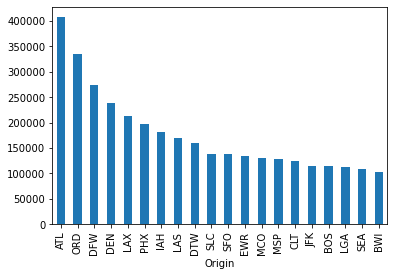

In [4]:
origin_del=df['ArrDelay'].groupby(df['Origin']).count()
origin_del.nlargest(20).plot.bar()
total_del=origin_del.sum()
#% del caused by top 10 airports
top_10_del=origin_del.nlargest(10).sum()/total_del*100
top_5_del=origin_del.nlargest(5).sum()/total_del*100
top_2_del=origin_del.nlargest(2).sum()/total_del*100
top_del=origin_del.nlargest(1).sum()/total_del*100
print(top_10_del,top_5_del,top_2_del,top_del)

Origin           ABE     ABI      ABQ     ABY    ACK     ACT     ACV    ACY  \
UniqueCarrier                                                                 
9E             970.0     NaN      NaN     NaN    NaN     NaN     NaN    NaN   
AA               NaN     NaN   3299.0     NaN    NaN     NaN     NaN    NaN   
AQ               NaN     NaN      NaN     NaN    NaN     NaN     NaN    NaN   
AS               NaN     NaN      NaN     NaN    NaN     NaN     NaN    NaN   
B6               NaN     NaN      NaN     NaN  107.0     NaN     NaN    NaN   
CO               NaN     NaN   1003.0     NaN    NaN     NaN     NaN    NaN   
DL               NaN     NaN   1317.0     NaN    NaN     NaN     NaN    NaN   
EV             895.0     NaN      NaN  1077.0    NaN     NaN     NaN  109.0   
F9               NaN     NaN   1095.0     NaN    NaN     NaN     NaN    NaN   
FL               NaN     NaN      NaN     NaN    NaN     NaN     NaN    NaN   
HA               NaN     NaN      NaN     NaN    NaN

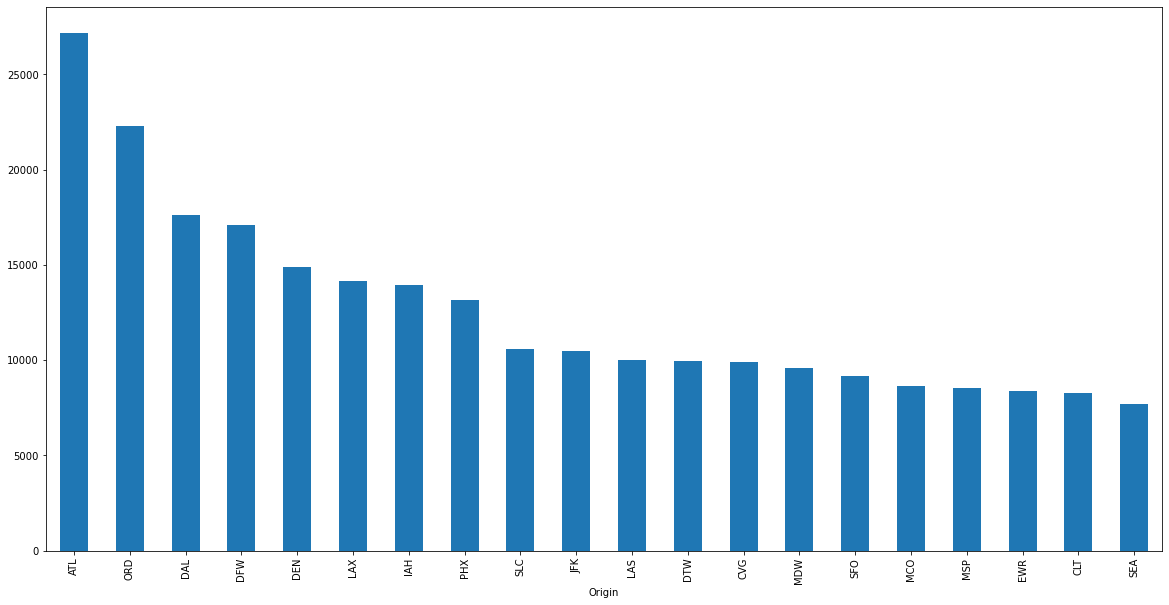

In [5]:
delay_table=pd.pivot_table(df, values = 'ArrDelay', index = 'UniqueCarrier',
               columns = 'Origin',aggfunc ='count')
print(delay_table)
delay_table.mean().nlargest(20).plot.bar(figsize=(20,10))
plt.show()

In [6]:
df['Date'] = pd.to_datetime(df.Year.map(str)+'-'+df.Month.map(str)+'-'+df.DayofMonth.map(str))

In [7]:
carrier_del=df['ArrDelay'].groupby(df['UniqueCarrier']).describe()
print(carrier_del)

                   count       mean        std    min   25%  50%   75%     max
UniqueCarrier                                                                 
9E              254322.0   4.111135  36.445516  -66.0 -13.0 -5.0   7.0  1143.0
AA              585485.0  12.607194  43.829002  -90.0  -9.0  1.0  18.0  1525.0
AQ                7752.0  -2.888674  15.780388  -90.0  -8.0 -4.0   0.0   338.0
AS              148492.0   4.804346  33.955213  -81.0 -12.0 -3.0  10.0   948.0
B6              192114.0  11.084184  48.399494  -83.0 -13.0 -3.0  15.0   834.0
CO              293855.0  10.979037  41.848055  -83.0  -9.0  0.0  14.0  1017.0
DL              443934.0   7.855163  35.441798  -86.0  -9.0 -1.0  12.0  1007.0
EV              274867.0  10.208002  41.753274  -89.0 -11.0 -2.0  14.0   940.0
F9               95384.0   6.108247  27.416857  -67.0  -8.0  0.0  11.0   809.0
FL              258713.0   9.091375  37.660098  -86.0  -9.0 -1.0  12.0  1175.0
HA               61212.0   1.264409  27.757878 -519.

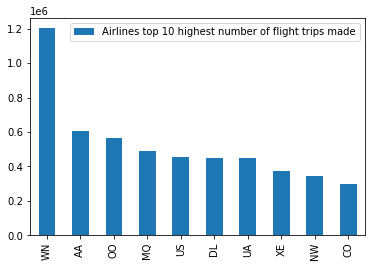

In [8]:
df['UniqueCarrier'].value_counts(sort=True).nlargest(10).plot.bar()
plt.legend(["Airlines top 10 highest number of flight trips made"]);

plt.show() 

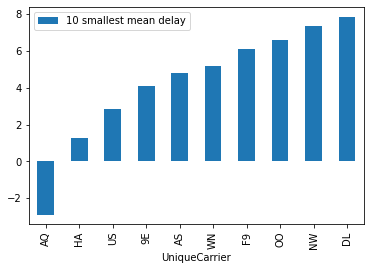

In [9]:
airline_delay=df['ArrDelay'].groupby(df['UniqueCarrier']).mean().nsmallest(10).plot.bar()
plt.legend(["10 smallest mean delay"]);

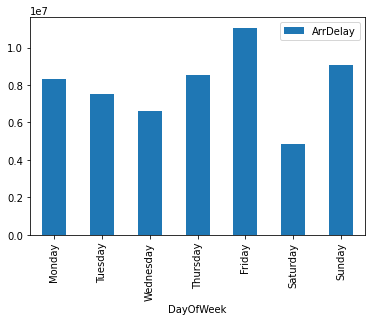

In [10]:
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dff = df.groupby('DayOfWeek').ArrDelay.sum().round(2)
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)
dff.plot.bar()
plt.show()

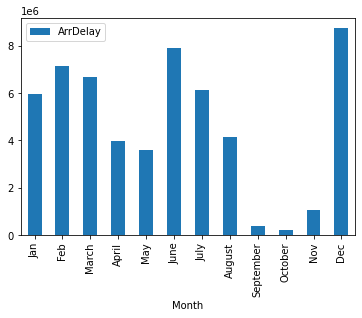

In [11]:
dayOfMonth={1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',8:'August',9:'September',10:'October',11:'Nov',12:'Dec'}
dff = df.groupby('Month').ArrDelay.sum().round(2)
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfMonth)
dff.plot.bar()
plt.show()

In [12]:
df=df[df['ArrDelay']>0]

In [13]:
plane_df=pd.read_csv('plane-data.csv')

plane_df=plane_df[plane_df['issue_date'].isna()==False]
print(plane_df)

     tailnum                 type                   manufacturer  issue_date  \
34    N10156          Corporation                        EMBRAER  02/13/2004   
35    N102UW          Corporation               AIRBUS INDUSTRIE  05/26/1999   
36    N10323          Corporation                         BOEING  07/01/1997   
37    N103US          Corporation               AIRBUS INDUSTRIE  06/18/1999   
38    N104UA          Corporation                         BOEING  01/26/1998   
...      ...                  ...                            ...         ...   
5024  N997DL          Corporation  MCDONNELL DOUGLAS AIRCRAFT CO  03/11/1992   
5025  N998AT          Corporation                         BOEING  01/23/2003   
5026  N998DL          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   
5027  N999CA  Foreign Corporation                       CANADAIR  07/09/2008   
5028  N999DN          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   

            model status            air

In [14]:
df['tailnum']=df['TailNum']
airline_df = df.merge(plane_df,  on = "tailnum",   how = "left")
print(airline_df.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4    754.0         735   1002.0   
1  2008      1           3          4    628.0         620    804.0   
2  2008      1           3          4   1829.0        1755   1959.0   
3  2008      1           3          4   1940.0        1915   2121.0   
4  2008      1           3          4   1937.0        1830   2037.0   

   CRSArrTime UniqueCarrier  FlightNum  ...       Date  tailnum         type  \
0        1000            WN       3231  ... 2008-01-03   N772SW  Corporation   
1         750            WN        448  ... 2008-01-03   N428WN  Corporation   
2        1925            WN       3920  ... 2008-01-03   N464WN  Corporation   
3        2110            WN        378  ... 2008-01-03   N726SW  Corporation   
4        1940            WN        509  ... 2008-01-03   N763SW  Corporation   

   manufacturer  issue_date    model status            aircraft_type  \
0        BOEING  08/

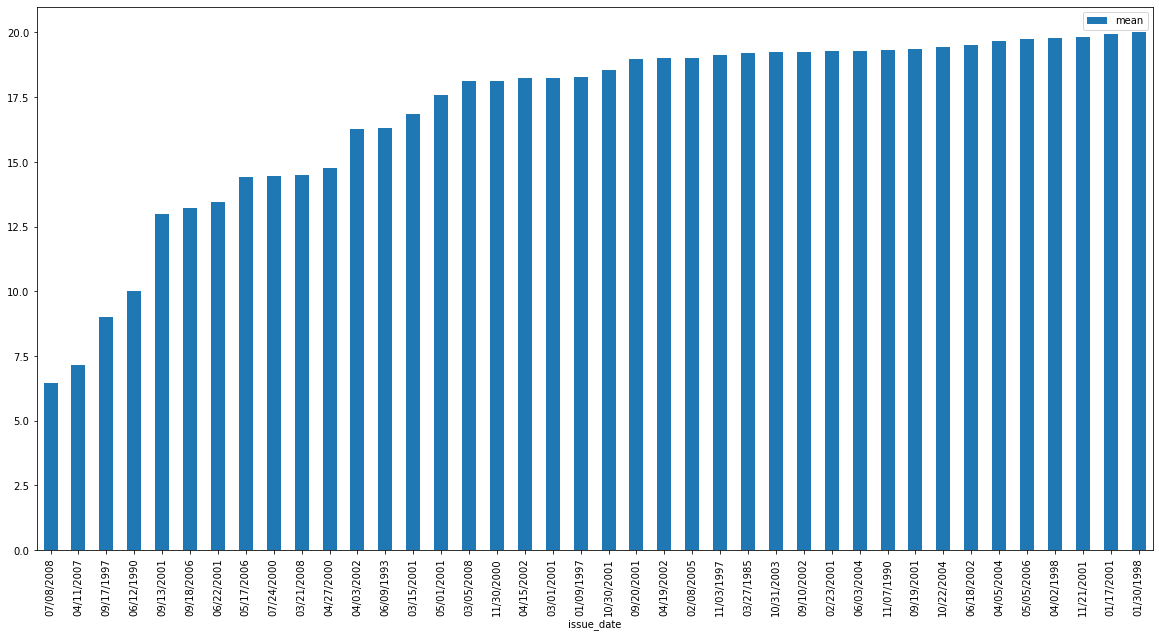

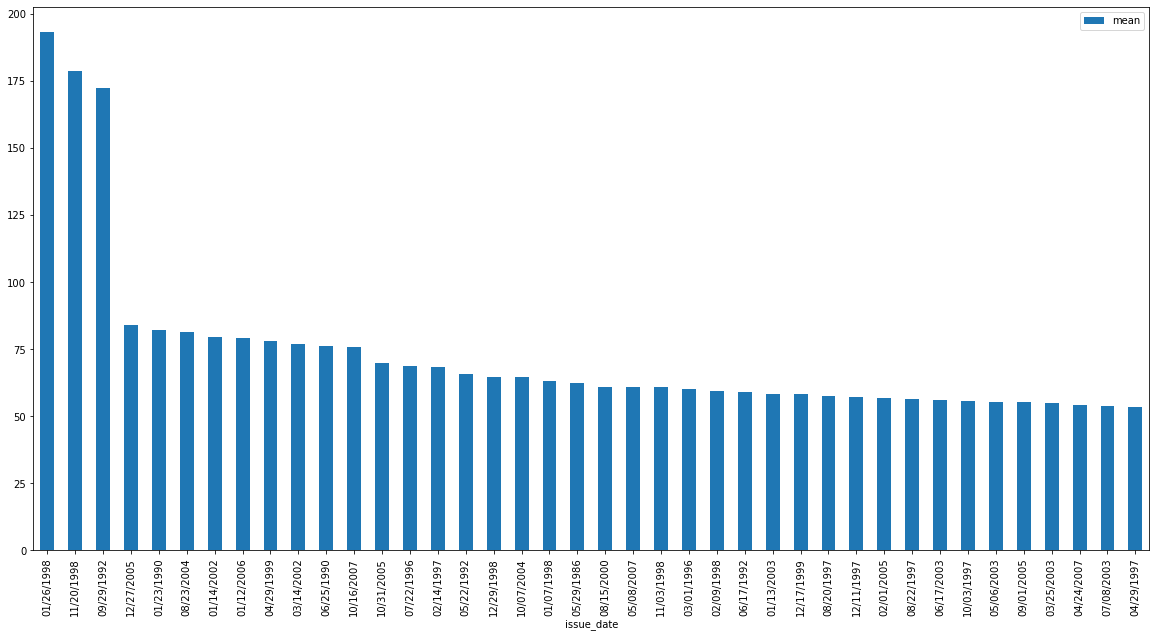

In [15]:
carrier_del_count=airline_df['ArrDelay'].groupby(airline_df['issue_date'])
carrier_del_count.agg(['mean']).sort_values(by='mean',ascending=True)[:40].plot.bar(figsize=(20, 10))
carrier_del_count.agg(['mean']).sort_values(by='mean',ascending=False)[:40].plot.bar(figsize=(20, 10))
plt.show()

In [16]:
from scipy.stats import chisquare
airline_df['Delayed']= np.where((airline_df['DepDelay']!=0) |(airline_df['ArrDelay']!=0),1,0)
chi,p =chisquare(np.array(airline_df.groupby(['issue_date'])['Delayed'].sum()))
print(airline_df.groupby(['issue_date'])['Delayed'].sum())
print("P value {:.6f}".format(p))
if p <0.05:
  print("There sufficient evidence to regect null hypothes")
else:
  print("There  no sufficient evidence to reject null hypothes")
#Since null hypothesis is rejected, older planes suffer more delay

issue_date
01/02/1989     537
01/02/1998     481
01/02/2001     798
01/02/2002     918
01/02/2003     941
              ... 
12/31/2001    2021
12/31/2002    1389
12/31/2003     909
12/31/2007     839
None           109
Name: Delayed, Length: 2412, dtype: int64
P value 0.000000
There sufficient evidence to regect null hypothes


In [17]:
# Function that convert the 'HHMM' string to datetime.time
def format_hour(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if chain == 2400: chain = 0
        chain = "{0:04d}".format(int(chain))
        hour = datetime.time(int(chain[0:2]), int(chain[2:4]))
        return hour
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_hour_date(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    list_date = []
    for index, cols in df[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            list_date.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list_date.append(combine_hour_date(cols))
        else:
            cols[1] = format_hour(cols[1])
            list_date.append(combine_hour_date(cols))
    return pd.Series(list_date)

In [18]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
airline_df_label= airline_df.select_dtypes(include=['object'])
airline_df_value=airline_df.select_dtypes(exclude=['object'])
airline_df_label=airline_df_label.astype(str).apply(preprocessing.LabelEncoder().fit_transform)


In [19]:
airline_df_label.head()
airline_encoded_df=pd.concat([airline_df_value,airline_df_label],axis=1)

In [20]:

airline_encoded_df['delay']=airline_encoded_df['ArrDelay']>5.00
airline_encoded_df['delay'].replace({False: 0, True: 1}, inplace=True)
airline_encoded_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,delay
0,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,4115,1,10,1457,52,1,1,3,41,1
1,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,1947,1,10,2349,52,1,1,3,43,1
2,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,2128,1,10,1359,52,1,1,3,45,1
3,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,3838,1,10,595,52,1,1,3,40,1
4,2008,1,3,4,1937.0,1830,2037.0,1940,509,240.0,...,4048,1,10,947,52,1,1,3,41,1


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
airline_encoded_df=airline_encoded_df.dropna()
airline_encoded_df_sample=airline_encoded_df.sample(frac =.05)
X=airline_encoded_df_sample.drop(['ArrDelay','delay','Date'], axis =1)
y=airline_encoded_df_sample['delay']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
model = ExtraTreesClassifier()
X_train.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,CancellationCode,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
count,53365.0,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,...,53365.0,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000,53365.000000
mean,2008.0,6.101209,15.708180,3.970205,1502.186414,1444.490865,1587.651682,1614.926581,2231.719423,143.985271,...,0.0,2719.011056,1.446585,15.394079,1380.369212,100.485918,1.109266,1.332840,3.733739,39.964452
std,0.0,3.513934,8.758844,1.985512,472.583846,439.705494,573.704031,472.444306,1985.163628,76.402772,...,0.0,1543.888031,1.252753,9.570108,746.742757,45.630355,0.311976,0.938341,1.259903,8.077481
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,1140.000000,1110.000000,1246.000000,1255.000000,623.000000,88.000000,...,0.0,1411.000000,1.000000,10.000000,765.000000,52.000000,1.000000,1.000000,3.000000,35.000000
50%,2008.0,6.000000,16.000000,4.000000,1541.000000,1500.000000,1710.000000,1657.000000,1557.000000,127.000000,...,0.0,2673.000000,1.000000,12.000000,1397.000000,119.000000,1.000000,1.000000,3.000000,41.000000
75%,2008.0,9.000000,23.000000,6.000000,1903.000000,1815.000000,2034.000000,2010.000000,3571.000000,178.000000,...,0.0,4007.000000,1.000000,19.000000,2046.000000,137.000000,1.000000,1.000000,4.000000,45.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,9740.000000,776.000000,...,0.0,5357.000000,5.000000,37.000000,2412.000000,165.000000,2.000000,4.000000,7.000000,51.000000


[0.         0.01659128 0.01563179 0.01502397 0.06155326 0.03730267
 0.03069955 0.02531854 0.0169589  0.05697059 0.02767804 0.02793678
 0.07862609 0.02248705 0.02929237 0.06262059 0.         0.
 0.10760933 0.01550142 0.11963165 0.00155855 0.08874996 0.
 0.01481874 0.01536721 0.0158947  0.01656635 0.         0.01574232
 0.00176298 0.00983651 0.01416041 0.01357151 0.00127321 0.00163664
 0.00822322 0.01340382]


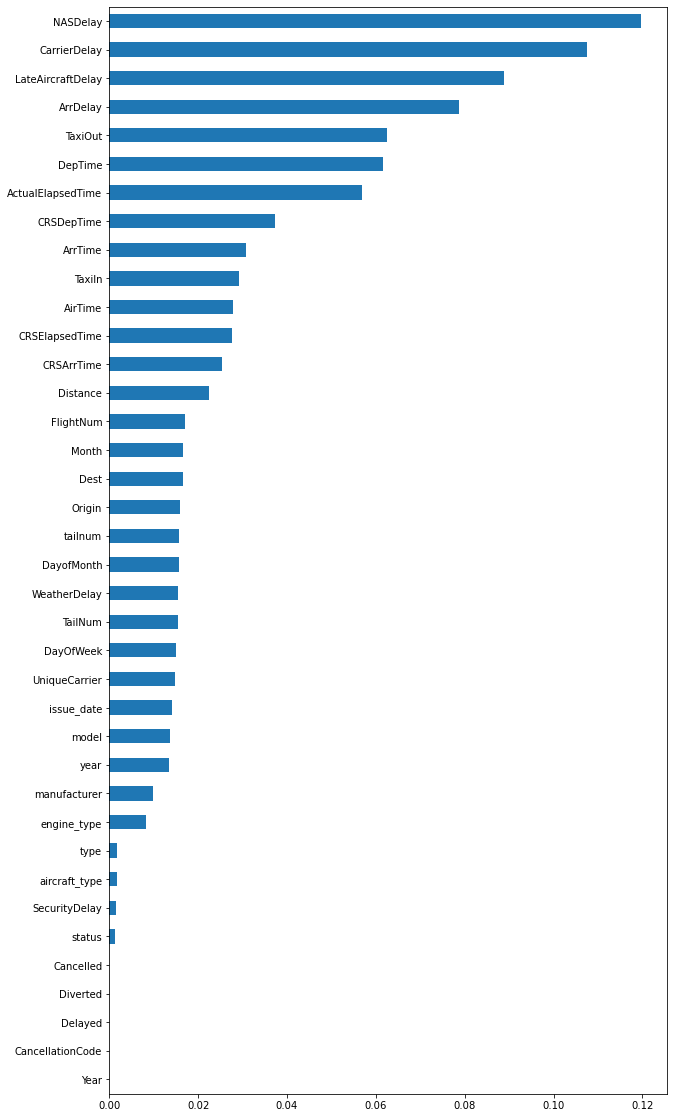

In [22]:
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh',figsize=(10, 20))
plt.show()

<AxesSubplot:>

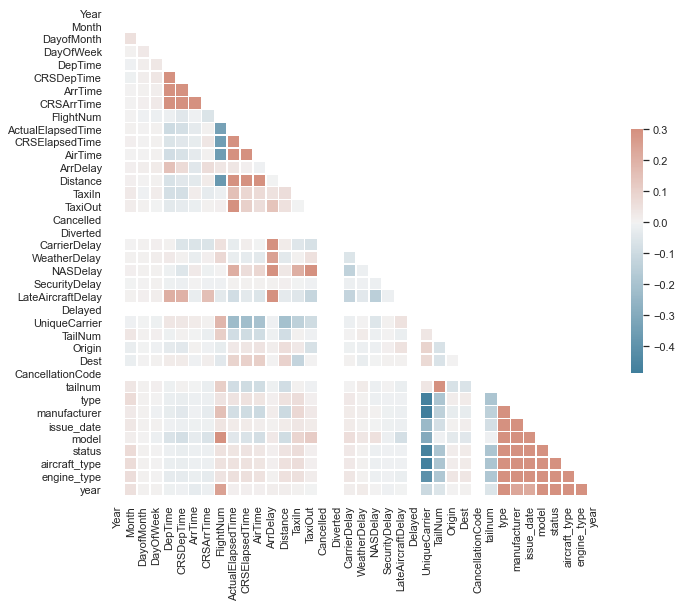

In [23]:
import seaborn as sns

sns.set_theme(style="white")
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
X_test=X_test.drop(['Year','CancellationCode','Delayed','Diverted','Cancelled','SecurityDelay','status','aircraft_type','type','year','engine_type','manufacturer','model','issue_date'],axis=1)
X_test.dtypes
X_train=X_train.drop(['Year','CancellationCode','Delayed','Diverted','Cancelled','SecurityDelay','status','aircraft_type','type','year','engine_type','manufacturer','model','issue_date'],axis=1)

In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.955870 0.004803 
LDA 0.876492 0.004668 
KNN 0.814129 0.005969 
CART 0.966026 0.002074 
NB 0.845179 0.006251 


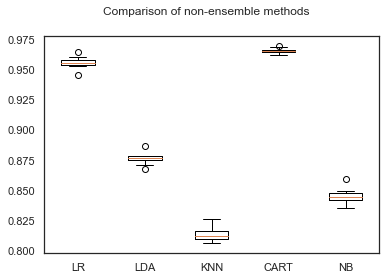

In [26]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [27]:

neighbors = [1, 3, 5, 7, 9, 15, 19, 21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826909 using {'n_neighbors': 21}
0.772398 (0.005230) with: {'n_neighbors': 1}
0.801386 (0.005862) with: {'n_neighbors': 3}
0.814129 (0.005969) with: {'n_neighbors': 5}
0.820350 (0.004223) with: {'n_neighbors': 7}
0.824342 (0.004850) with: {'n_neighbors': 9}
0.826741 (0.005780) with: {'n_neighbors': 15}
0.826684 (0.006056) with: {'n_neighbors': 19}
0.826909 (0.005659) with: {'n_neighbors': 21}


AB: 0.966195 (0.002219)
GBM: 0.973035 (0.001898)
RF: 0.975677 (0.001766)
ET: 0.970224 (0.002920)


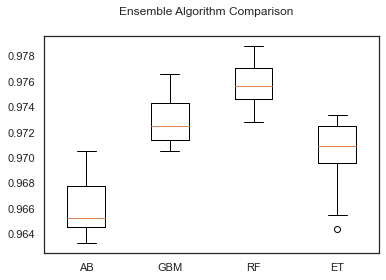

In [28]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();


In [29]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9745977614550542


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4182
           1       0.99      0.98      0.98     18690

    accuracy                           0.97     22872
   macro avg       0.96      0.96      0.96     22872
weighted avg       0.97      0.97      0.97     22872



In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
airline_encoded_df=airline_encoded_df.dropna()
airline_encoded_df_sample=airline_encoded_df.sample(frac =.05)
X=airline_encoded_df_sample.drop(['ArrDelay','delay','Date'], axis =1)
y=airline_encoded_df_sample['ArrDelay']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  

regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [33]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
import math

 
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
r2=r2_score(y_test, y_pred)
print("R2 Score:\n")
print(r2)

Root Mean Square Error:

7.782957830979896
R2 Score:

0.9811166045003865
